## Alchemix Question 23: Relationship between ALCX and FEI users?

Authors: dtradke, monetcapital, ryanl

Date: 4/26/21

This notebook addresses question \#23 on the site https://www.notion.so/Analytics-Bounties-for-Alchemix-ffd6c25bdef3486c9b8dfa9476ac6a39. The question is aimed at understanding ALCX users who participated in FEI's Token Genesis Event, specifically their combined value in FEI, and their staking/farming patterns with ALCX and FEI/TRIBE.

In [1]:
# import libraries
import re, datetime, time, csv
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as rq
import numpy as np
import json
import os

In [2]:
# import backend code for processing
import util

In [3]:
# load/format value of current users with FEI and Tribe value in USD
url = 'https://api.flipsidecrypto.com/api/v2/queries/9b0a847f-a4dd-4d21-a3d3-f57d64b07090/data/latest' 
fei_tribe = util.loadData(url)
fei_tribe_val = util.formatFEITribeVal(fei_tribe)

In [4]:
# get Genesis event attendees
url = 'https://api.flipsidecrypto.com/api/v2/queries/7c26c1cd-f59f-40b0-892d-f0d229052df3/data/latest'
genesis_event_users = util.loadData(url)

In [5]:
# get alcx holders
url = 'https://api.flipsidecrypto.com/api/v2/queries/ddf70c0d-d6e2-41a1-a014-6f33e84fab72/data/latest'
alcx_holders = util.loadData(url)
alcx_holders = util.formatHolders(alcx_holders)

In [6]:
# get alcx holders who attended event
alcx_genesis_event = util.alcxHoldersAtEvent(genesis_event_users, alcx_holders, fei_tribe_val)

In [9]:
print("Number of Alchemix users who participated in FEI's Token Genesis Event:  ", alcx_genesis_event.shape[0])

Number of Alchemix users who participated in FEI's Token Genesis Event:   112


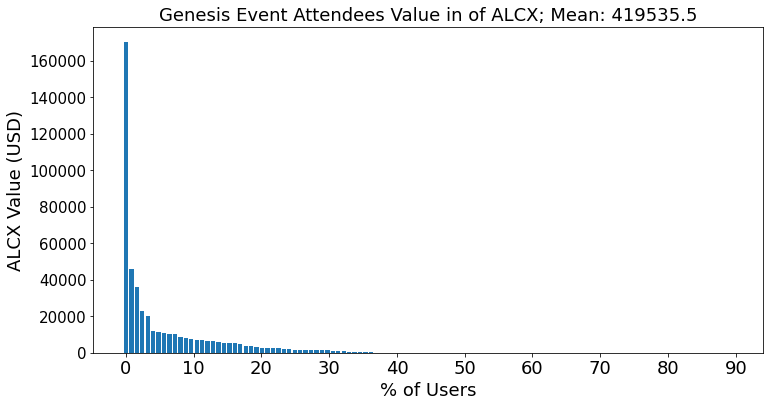

In [10]:
# Amount of ALCX for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'ALCX','ALCX Value (USD)', 'Genesis Event Attendees Value in of ALCX')

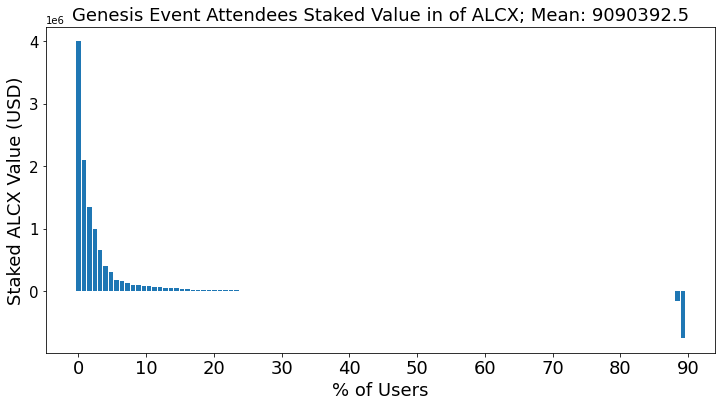

In [11]:
# Amount of ALCX staked for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'STAKED_ALCX','Staked ALCX Value (USD)', 'Genesis Event Attendees Staked Value in of ALCX')

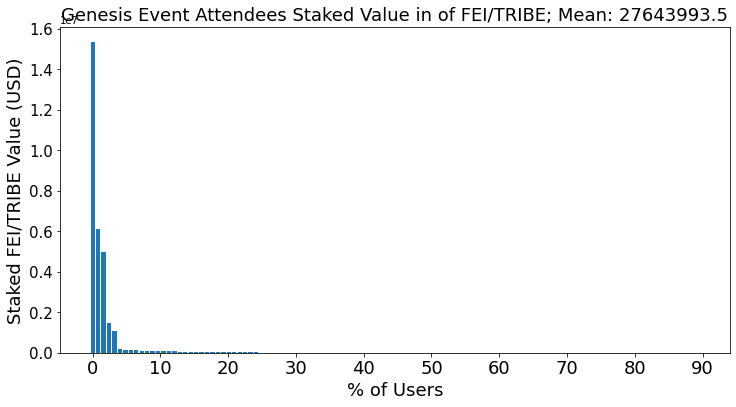

In [12]:
# Amount of FEI/TRIBE staked for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'STAKED_FEITRIBE','Staked FEI/TRIBE Value (USD)', 'Genesis Event Attendees Staked Value in of FEI/TRIBE')